### The data set has information about features of silhouette extracted from the images of different cars

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.



### 1. Read the dataset using function .dropna() - to avoid dealing with NAs as of now

In [36]:
import pandas as pd

In [55]:
vehicle = pd.read_csv('vehicle.csv')
vehicle.dropna(inplace=True)
vehicle.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [56]:
vehicle.shape

(813, 19)

### 2. Print/ Plot the dependent (categorical variable) - Class column

Since the variable is categorical, you can use value_counts function

In [57]:
vehicle['class'].value_counts()

car    413
bus    205
van    195
Name: class, dtype: int64

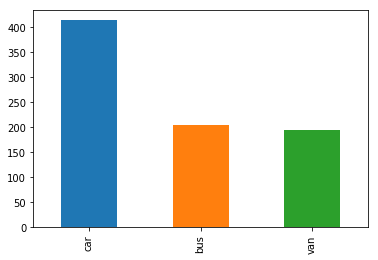

In [58]:
pd.value_counts(vehicle['class']).plot(kind = 'bar')

### Check for any missing values in the data 

In [70]:
vehicle.isna().any()

compactness                    False
circularity                    False
distance_circularity           False
radius_ratio                   False
pr.axis_aspect_ratio           False
max.length_aspect_ratio        False
scatter_ratio                  False
elongatedness                  False
pr.axis_rectangularity         False
max.length_rectangularity      False
scaled_variance                False
scaled_variance.1              False
scaled_radius_of_gyration      False
scaled_radius_of_gyration.1    False
skewness_about                 False
skewness_about.1               False
skewness_about.2               False
hollows_ratio                  False
class                          False
dtype: bool

In [71]:
vehicle.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
compactness,813,NaN,NaN,NaN,93.6568,8.23375,73,87,93,100,119
circularity,813,NaN,NaN,NaN,44.8032,6.14666,33,40,44,49,59
distance_circularity,813,NaN,NaN,NaN,82.0431,15.7831,40,70,79,98,112
radius_ratio,813,NaN,NaN,NaN,169.098,33.6154,104,141,167,195,333
pr.axis_aspect_ratio,813,NaN,NaN,NaN,61.7749,7.973,47,57,61,65,138
max.length_aspect_ratio,813,NaN,NaN,NaN,8.59902,4.67717,2,7,8,10,55
scatter_ratio,813,NaN,NaN,NaN,168.563,33.0822,112,146,157,198,265
elongatedness,813,NaN,NaN,NaN,40.9889,7.80338,26,33,43,46,61
pr.axis_rectangularity,813,NaN,NaN,NaN,20.5584,2.57318,17,19,20,23,29
max.length_rectangularity,813,NaN,NaN,NaN,147.892,14.5046,118,137,146,159,188


### 3. Standardize the data 

In [110]:
vehicle1 = vehicle.drop(['class'], axis = 1)
vehicle1

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202


In [111]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
## it calculates mean(f1) & std(f1)
scalar.fit(vehicle1)
##[(f1-mean(f1))/(std(f1))]
data=scalar.transform(vehicle1)
vehicle1

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208
10,86,36.0,70.0,143.0,61.0,9,133.0,50.0,18.0,130,153.0,266.0,127.0,66.0,2.0,10.0,194.0,202
11,90,34.0,66.0,136.0,55.0,6,123.0,54.0,17.0,118,148.0,224.0,118.0,65.0,5.0,26.0,196.0,202


In [85]:
vehicle1=pd.DataFrame(vehicle1)
vehicle1.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183


Since the dimensions of the data are not really known to us, it would be wise to standardize the data using z scores before we go for any clustering methods.
You can use zscore function to do this

In [79]:
from scipy.stats import zscore

In [103]:
vehicle_stat=zscore(vehicle1,axis=1)
vehicle_stat

array([[-0.35311022,  0.10822552,  0.4505037 , ...,  0.87967304,
        -2.92865916, -2.26945501],
       [-0.35306059,  0.10819258,  0.45055246, ...,  0.87971118,
        -2.9285333 , -2.26935426],
       [-0.35327719,  0.10807702,  0.45034744, ...,  0.87951895,
        -2.92894882, -2.26973399],
       ...,
       [-0.3533821 ,  0.10804043,  0.45027873, ...,  0.8794639 ,
        -2.9292081 , -2.26992149],
       [-0.35299331,  0.10821252,  0.45063407, ...,  0.8798149 ,
        -2.92844118, -2.26929365],
       [-0.35292741,  0.10826919,  0.45068041, ...,  0.87983787,
        -2.92835418, -2.26919913]])

### K - Means Clustering

### 4. Assign a dummy array called distortion

In [95]:
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
distortions = []

You can later use this array to plot the elbow plot

### 5. Calculating distortion - C distance

In [99]:
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(vehicle_stat)
distortions.append(km.inertia_)

Iterating values of k from 1 to 10 fit K means model
Using c distance - Get the measure for Sum of squares error.

### 6. Plotting Elbow/ Scree Plot

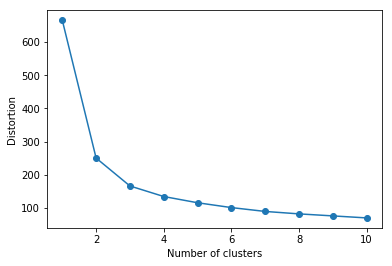

In [97]:
    # plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Use Matplotlib to plot the scree plot - Note: Scree plot plots distortion vs the no of clusters

In [145]:
### The Centroid for cluster is 5

### Find out the optimal value of K

### Using optimal value of K - Cluster the data. 
Note: Since the data has more than 2 dimension we cannot visualize the data. As an alternative, we can observe the centroids and note how they are distributed across different dimensions

You can use kmeans.cluster_centers_ function to pull the centroid information from the instance

In [113]:
km=KMeans(n_clusters=4)
km.fit(vehicle1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

### 7. Store the centroids in a dataframe with column names from the original dataset given 

In [107]:
type(km.cluster_centers_)

numpy.ndarray

Hint: Use pd.Dataframe function 

In [112]:
data_clu=pd.DataFrame(km.cluster_centers_,columns=vehicle1.columns)
data_clu

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,-0.241738,-0.703320,-0.318729,0.627398,-0.520744,-1.028641,0.496681,-0.763394,-0.910499,0.206197,0.692589,3.155979,0.429379,-0.484363,-1.046256,-0.963651,0.657200,0.715914
1,-0.414673,-0.873889,-0.523898,1.512936,-0.112983,-0.828350,0.271263,-0.878269,-1.156388,0.282848,1.233122,2.263976,0.598751,-0.180537,-1.309476,-1.249350,0.640681,0.724235
2,-0.120989,-0.831438,-0.379093,0.627993,-0.535493,-1.226290,0.483291,-0.666769,-1.089057,0.458383,0.782546,2.321156,0.385982,-0.438485,-1.271842,-1.144800,1.279464,1.365442
3,-0.191073,-0.786473,-0.355606,0.709194,-0.497281,-1.124180,0.516851,-0.738335,-0.990607,0.252550,0.762536,2.837733,0.283254,-0.461433,-1.160828,-1.023385,0.947684,1.019398
4,-0.222421,-0.758549,-0.372634,0.607033,-0.520464,-1.164675,0.492011,-0.752922,-1.035788,0.405231,0.747800,2.712704,0.675299,-0.441535,-1.173384,-1.133593,0.928416,1.007471
5,-0.255829,-0.573095,-0.266631,0.326371,-0.527801,-0.844682,0.467857,-0.718376,-0.753102,0.144474,0.535600,3.581568,0.426755,-0.451755,-0.859920,-0.805024,0.259880,0.313709
6,-0.242917,-0.729063,-0.400326,0.328813,-0.576179,-1.156477,0.535146,-0.730635,-1.025068,0.492120,0.761255,2.737673,0.842566,-0.322535,-1.188324,-1.151597,0.877816,0.947732
7,-0.086046,-0.839952,-0.533970,0.499338,-0.541778,-1.325926,0.436233,-0.559117,-1.147277,0.577536,0.748793,1.892005,0.702718,-0.276034,-1.293953,-1.243644,1.458809,1.532265
8,-0.251270,-0.631633,-0.261379,0.523138,-0.522396,-0.929301,0.470262,-0.755205,-0.829868,0.154678,0.606412,3.401010,0.486028,-0.487221,-0.950725,-0.894317,0.406862,0.464927
9,-0.156685,-0.794968,-0.457476,0.477233,-0.568486,-1.250389,0.494731,-0.672176,-1.098425,0.521657,0.786673,2.339418,0.763839,-0.328794,-1.247684,-1.219163,1.172712,1.237984


### Use kmeans.labels_ function to print out the labels of the classes

In [127]:
from sklearn.cluster import KMeans 
km=KMeans(n_clusters=5)
km.fit(vehicle1)
print(km.labels_)

[0 0 4 0 0 0 3 3 3 3 0 0 2 4 3 2 4 0 3 0 0 4 0 3 4 2 0 0 3 3 4 0 0 0 4 0 4
 3 0 0 4 0 3 0 0 0 3 0 4 0 1 3 2 0 4 3 2 3 3 0 2 0 4 0 2 4 2 3 0 2 2 0 0 4
 3 0 0 1 0 3 2 3 4 2 4 0 0 4 0 0 4 0 0 0 3 3 2 2 0 0 2 0 0 0 3 0 0 4 4 2 3
 0 0 3 0 0 0 0 0 4 2 0 2 3 4 0 0 3 3 0 0 4 0 0 4 0 0 0 3 2 2 0 4 0 1 0 3 0
 3 4 0 3 4 4 0 4 0 3 4 1 0 4 0 0 2 0 3 4 3 0 3 4 2 2 0 4 0 2 0 1 0 0 4 0 0
 0 0 0 4 4 3 0 0 0 4 2 3 0 4 3 0 4 0 3 4 0 0 3 0 4 3 4 0 3 3 0 4 3 0 0 4 0
 0 0 0 4 0 3 0 2 4 3 4 0 0 0 4 0 0 4 4 3 2 3 3 2 0 0 3 3 0 2 0 1 0 0 3 4 0
 2 0 0 4 0 0 4 3 3 0 0 3 1 0 2 3 2 2 4 0 0 3 0 0 4 4 4 2 0 0 4 0 3 3 2 3 4
 1 0 2 2 0 2 0 0 0 2 4 0 1 4 0 4 0 0 0 3 3 4 4 4 0 0 3 2 0 0 0 2 2 0 4 0 2
 4 2 2 0 0 4 0 3 0 0 2 0 2 3 4 4 3 3 4 3 1 0 4 0 0 2 0 0 4 0 3 0 0 2 0 0 0
 3 4 0 4 3 4 0 3 0 0 2 0 3 0 3 0 4 0 0 0 3 4 3 0 2 3 4 2 4 3 4 4 0 0 4 3 3
 0 2 2 2 0 3 2 1 0 2 4 4 0 0 0 0 0 4 0 3 0 4 2 3 4 2 0 2 0 0 4 3 3 4 4 4 0
 4 4 0 2 0 4 4 0 3 0 0 4 0 0 4 4 0 0 4 1 0 0 3 4 4 4 3 0 2 4 4 0 0 4 0 0 4
 0 3 3 0 4 0 3 2 3 0 4 0 

## Hierarchical Clustering 

### 8. Variable creation

For Hierarchical clustering, we will create datasets using multivariate normal distribution to visually observe how the clusters are formed at the end

In [177]:
import numpy as np

In [227]:
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
c = np.random.multivariate_normal([10, 20], [[3, 1], [1, 4]], size=[100,])

In [228]:
d=np.append(a,b,axis=0)
d=np.append(d,c,axis=0)

In [229]:
df1=pd.DataFrame(d)

### 9. Combine all three arrays a,b,c into a dataframe

In [230]:
conc=np.concatenate((a,b,c),axis=0)
df1=pd.DataFrame(conc)
df1.head()

,0,1
0,10.820581,2.302400
1,7.569454,-0.798880
2,9.153098,1.857663
3,11.901166,2.955830
4,7.653238,-1.784983


In [233]:
df1.shape

(250, 2)

### 10. Use scatter matrix to print all the 3 distributions

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


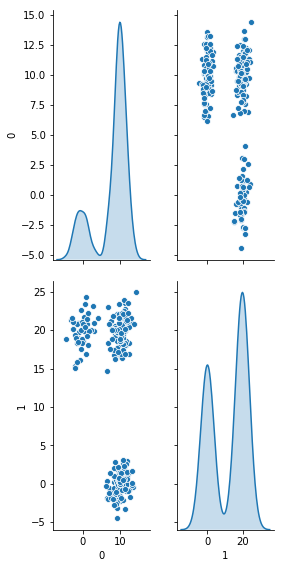

In [235]:
sns.pairplot(df1, size=4,aspect=0.5 , diag_kind='kde')

### 11. Find out the linkage matrix

In [236]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import cophenet,dendrogram,linkage
from scipy.spatial.distance import pdist
model=AgglomerativeClustering(n_clusters=3,affinity='euclidean',linkage='ward')
model.fit(df1)
Z=linkage(df1,'ward',metric='euclidean')
c,coph_dists=cophenet(Z,pdist(df1))
print(c)

0.963304234736322


Use ward as linkage metric and distance as Eucledian

### 12. Plot the dendrogram for the consolidated dataframe

In [237]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist

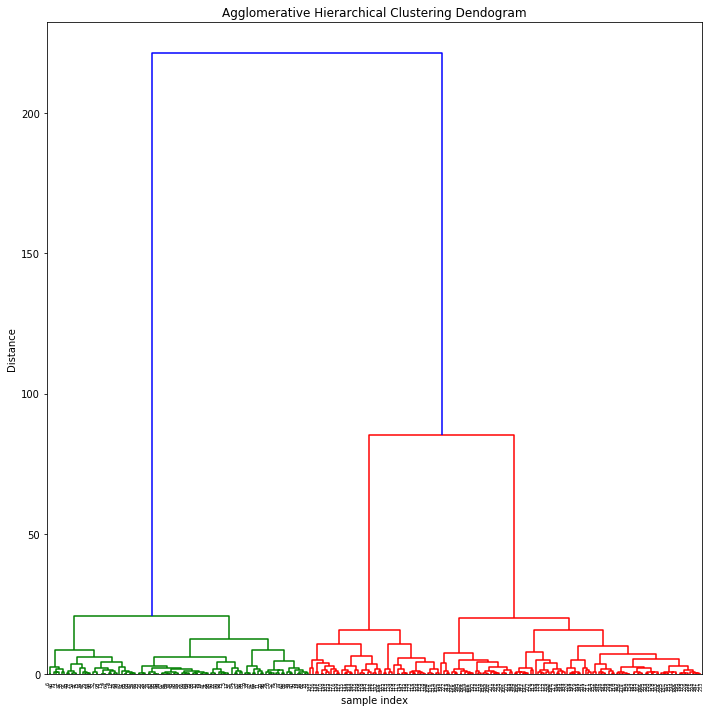

In [238]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z)
plt.tight_layout()

### 13. Recreate the dendrogram for last 12 merged clusters 

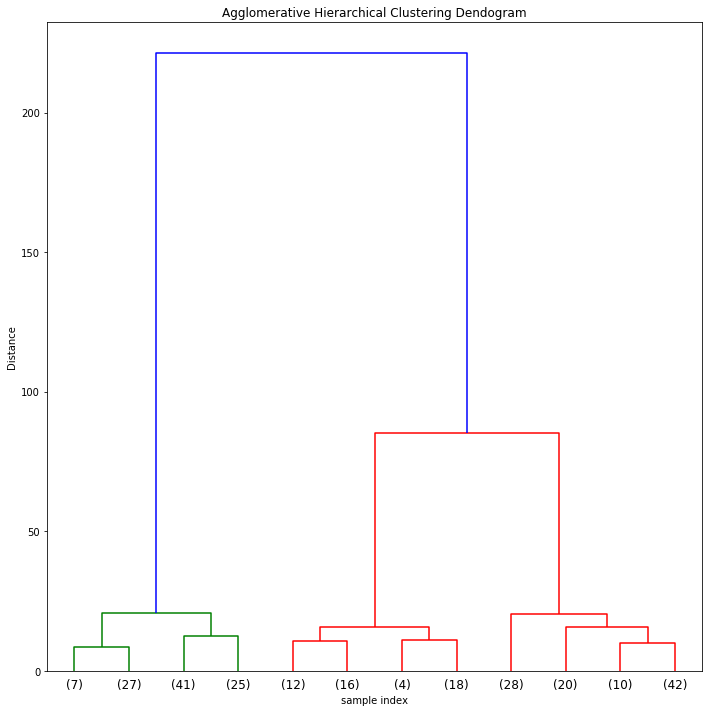

In [239]:
plt.figure(figsize=(10, 10))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z,p=12,truncate_mode='lastp')
plt.tight_layout()

Hint: Use truncate_mode='lastp' attribute in dendrogram function to arrive at dendrogram 

### 14. From the truncated dendrogram, find out the optimal distance between clusters which u want to use an input for clustering data

In [147]:
## The clustring data is between 5 & 18

### 15. Using this distance measure and fcluster function to cluster the data into 3 different groups

In [240]:
from scipy.cluster.hierarchy import ward,fcluster
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import fclusterdata

In [241]:
a=fcluster(Z,t=25,criterion='distance')
a

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3], dtype=int32)

In [242]:
len(a)

250

### Use matplotlib to visually observe the clusters in 2D space 

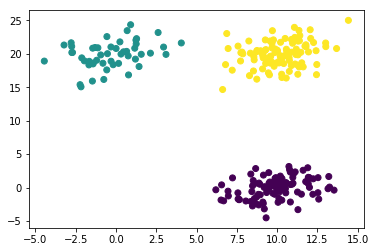

In [243]:
import matplotlib.pyplot as plt
plt.scatter(df1.iloc[:,0],df1.iloc[:,1],c=a)